## mplfinance

* 股票資料繪圖套件
* 楊右宇 
* 建檔日期：2021.11.14  
* 最後修改日期：2021.11.14

## 參考資料 

* https://github.com/matplotlib/mplfinance

## Content of Table

* mplfinance簡介
    * 軟體安裝
    * 語法
        * 傳入Dataframe的格式
* 繪製不同的圖形
* 繪製量、價與移動平均線
* 繪圖的格式設定
    * 標題
    * 格線與顏色
    * 圖例
* 增加自訂的繪圖資料
    * 布林通道
    * KD 指標
* 多圖的配置
    * MACD
    * RSI
* 標示買賣點
* 買賣策略 
* 計算投資報酬率（包含進出次數、價格...)


In [1]:
# 看安裝了哪些軟體：
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.1.0
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

# 使用前需要先安裝軟體

In [2]:
!pip install mplfinance

In [3]:
!pip install --upgrade mplfinance

# 語法、使用格式及參數的輸出入 
* 語法：mplfinance.plot(股票資料的dataframe格式,其它參數)
* 股票資料的格式：
    * 傳入Dataframe的格式
        * columns 名稱
            * mplfinance.plot()函式需要匯入的股票資料中，欄位名稱必須取名['Open', 'High', 'Low', 'close', 'Volume'] ，第一個字母都是要大寫
            * 註：talib.abstract 模組的函式需要匯入的資料中，['open', 'high', 'low', 'close', 'volume'] 都是要小寫


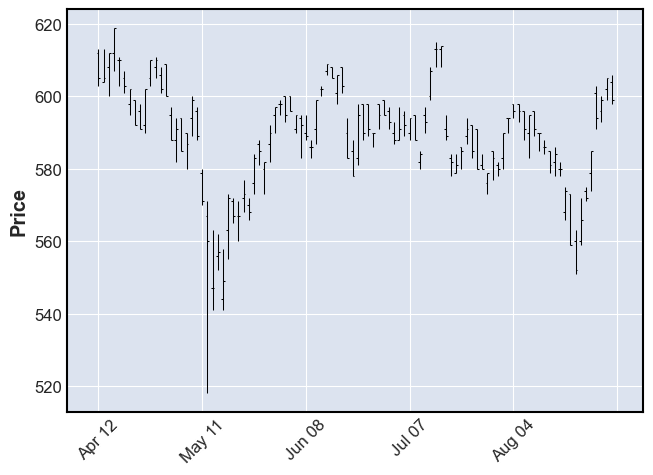

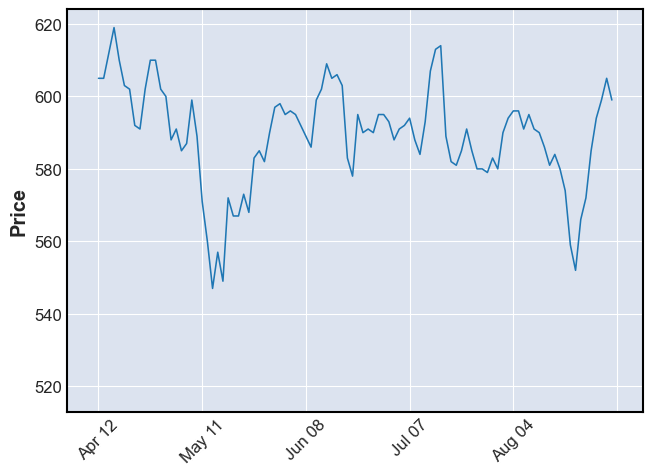

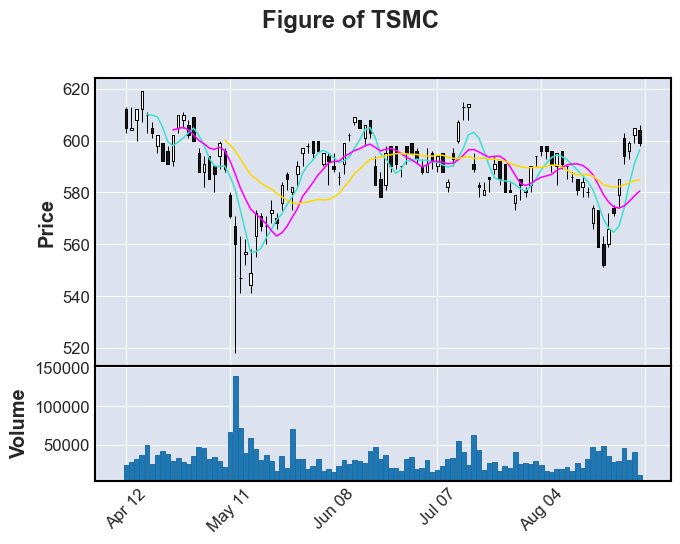

In [4]:
import mplfinance as mpf
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

SData = SData.tail(100)        # 取最後100筆

mpf.plot(SData)    # 使用預設的方式繪製股價 K線圖

mpf.plot(SData, type = 'line')   # 繪製股價折線圖

# 加上參數繪製股價圖
mpf.plot(SData, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 10, 20))  # 5日線、10線、月線

            Open  High   Low  Close     Volume
Date                                          
2011-08-31  69.1  69.4  67.8   69.4  47789.802
2011-09-01  69.4  69.8  68.6   68.6  47994.636
2011-09-02  69.5  69.5  67.1   67.5  44964.008
2011-09-05  66.1  67.1  65.9   66.6  49912.276
2011-09-06  66.5  67.2  66.1   66.1  40850.716


C:\Users\royya\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


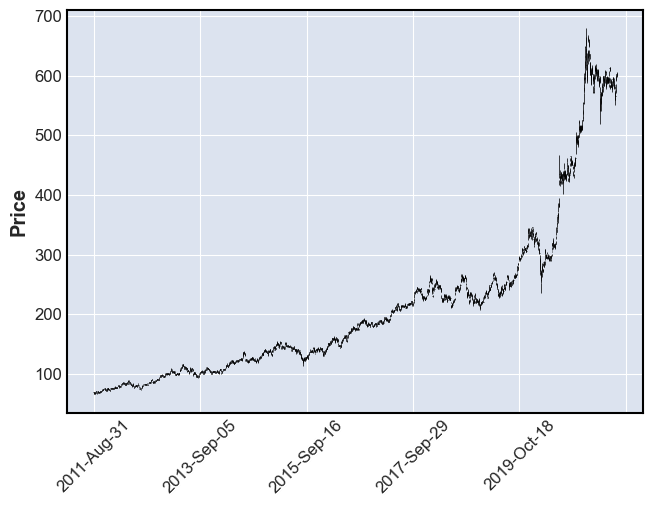

In [5]:
# new
# CSV檔案無欄位名稱時，pd.read_csv()需加入 names = ...，以設定欄位名稱

import mplfinance as mpf
import pandas as pd

SData = pd.read_csv('../data/2330_without_columns.csv', names =  ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'],index_col = 'Date')
SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定
print(SData.head())
mpf.plot(SData)    # 使用預設的方式繪製股價 K線圖

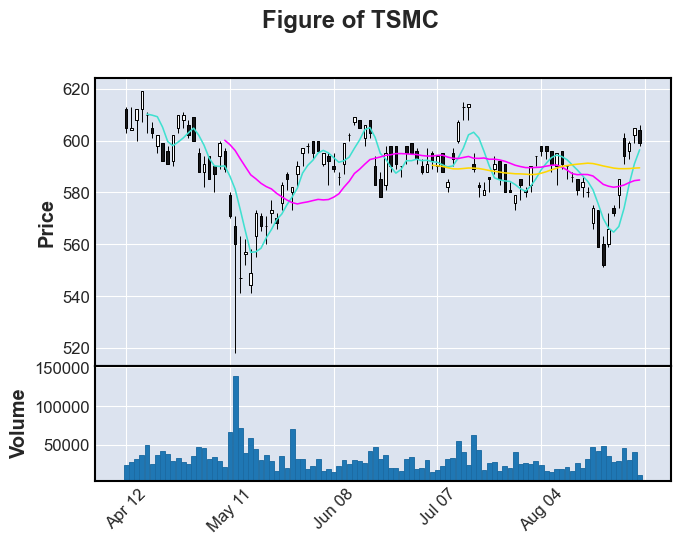

In [6]:
from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(100)        # 取最後100筆

mpf.plot(SData, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 20, 60))  # 5日線、10日線、季線

## 改變 K線圖的顏色 

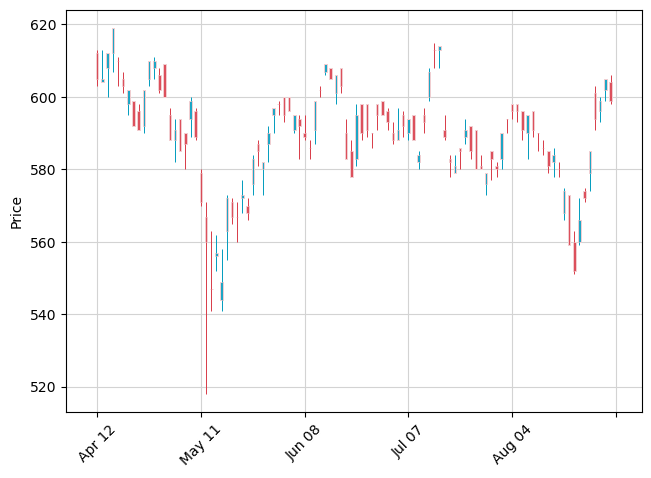

In [7]:
# 改變 K線圖的顏色 1

from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(100)        # 取最後100筆

mc = mpf.make_marketcolors(up='#049DBF', down='#D93D4A', volume='#F2C84B', 
    edge='#F2CED1', wick={'up':'#049DBF', 'down':'#D93D4A'})
cs  = mpf.make_mpf_style(marketcolors=mc, gridcolor="lightgray")

mpf.plot(SData, type='candle', style=cs)

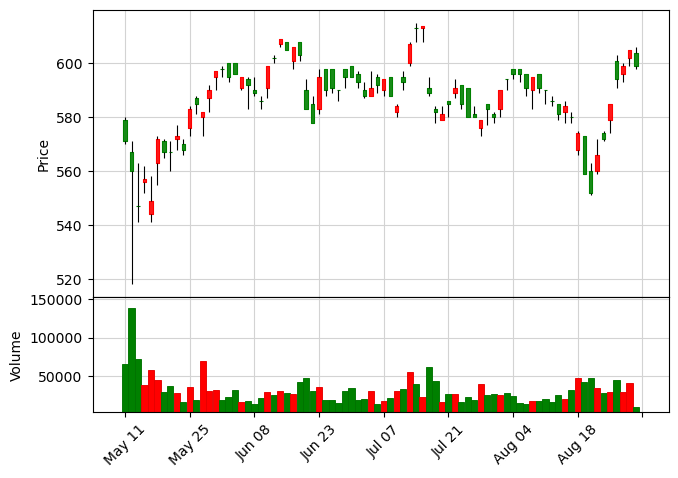

In [8]:
# 改變 K線圖的顏色 2

from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(80)        # 取最後80筆

mc = mpf.make_marketcolors(up='r', down='g', volume='inherit', edge='inherit')
cs  = mpf.make_mpf_style(marketcolors=mc, gridcolor="lightgray")

mpf.plot(SData, type='candle', volume=True, style=cs)

## 選取部分資料

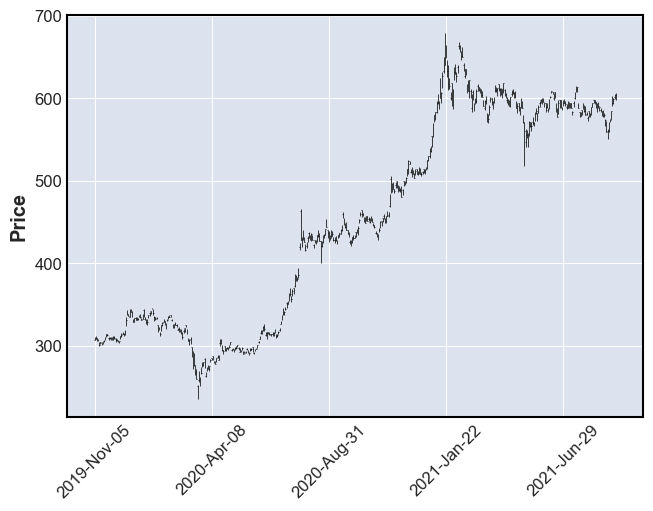

In [9]:
# 選取部分資料後畫圖 (建議使用此方法)

from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.loc['2019/11/05':,:]
# 選取 2019/11/05之後的資料

# SData = SData.loc['2019/11/05':'2020/7/10',:]  
# 選取 2019/11/05至 2020/7/10的資料

# SData = SData.loc['2019-11-06 15:00':'2019-11-06 16:00',:]


import mplfinance as mpf

mpf.plot(SData)

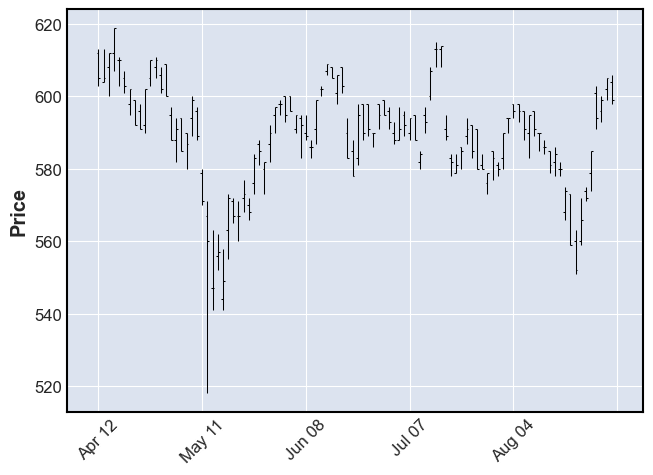

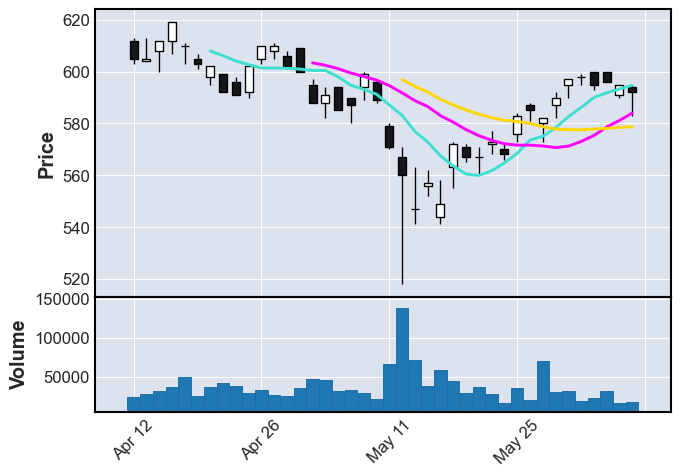

In [10]:
# 選取部分資料後畫圖

from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData2 = SData.tail(100)  # 只取最後100筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf
mpf.plot(SData2)


setup = dict(type='candle',volume=True,mav=(7,15,22))
mpf.plot(SData2.iloc[0: 40],**setup)
# 只取最前面40筆的資料

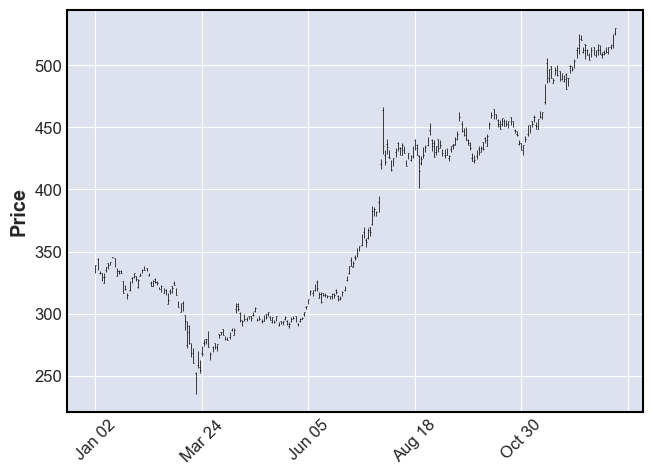

In [12]:
# 選取部分資料（例如只選取2020年的股票資料）後畫圖

from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv')    
# 先不要設定index_col = 'Date'，之後再設定，以便選取部分資料

# SData2 = SData[SData['Date'].str.startswith('2020') | SData['Date'].str.startswith('2019')]  # 取部分資料
SData2 = SData[SData['Date'].str.startswith('2020')]  # 只取2020年的資料
SData2.index = SData2['Date']
# SData2.set_index("Date" , inplace=True)  #  上一行也可以使用這一行取代
SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf
mpf.plot(SData2)

## 把假日也畫出來

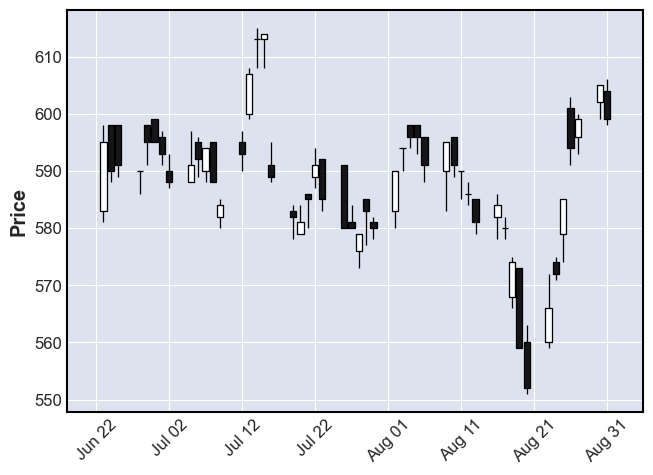

In [14]:
# 把假日也畫出來

# 選取部分資料後畫圖

from datetime import datetime
import pandas as pd
import mplfinance as mpf

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData2 = SData.tail(50)  # 只取最後100筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)

mpf.plot(SData2, type='candle', show_nontrading=True)

## 繪製不同的圖形

* 可以使用 mpf.available_styles() 來看有哪些 style可以使用

In [13]:
print(mpf.available_styles())

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


In [15]:
# test


from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv')
print(SData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2458 non-null   object 
 1   Open    2458 non-null   float64
 2   High    2458 non-null   float64
 3   Low     2458 non-null   float64
 4   Close   2458 non-null   float64
 5   Volume  2458 non-null   float64
dtypes: float64(5), object(1)
memory usage: 115.3+ KB
None


In [17]:
# test

# 繪製不同的圖形

from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')  # 將 Date 欄位設為 index，但資料型態仍是 object，為字串
print(SData.info())

SData.index = pd.DatetimeIndex(SData.index)
print(SData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, 2011/08/31 to 2021/08/31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2458 non-null   float64
 1   High    2458 non-null   float64
 2   Low     2458 non-null   float64
 3   Close   2458 non-null   float64
 4   Volume  2458 non-null   float64
dtypes: float64(5)
memory usage: 115.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2458 entries, 2011-08-31 to 2021-08-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2458 non-null   float64
 1   High    2458 non-null   float64
 2   Low     2458 non-null   float64
 3   Close   2458 non-null   float64
 4   Volume  2458 non-null   float64
dtypes: float64(5)
memory usage: 115.2 KB
None


Candle:


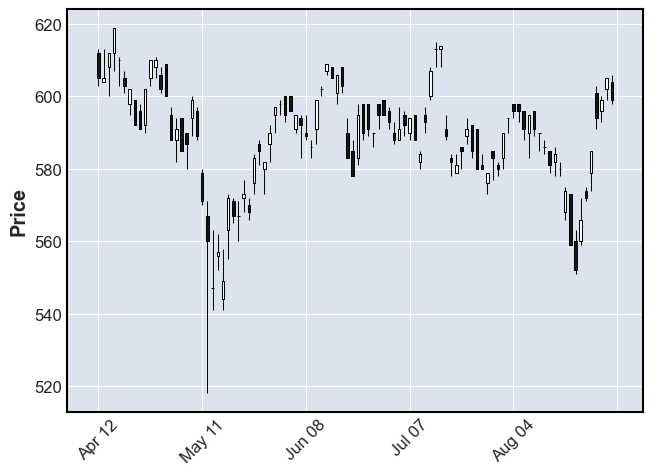

ohlc:


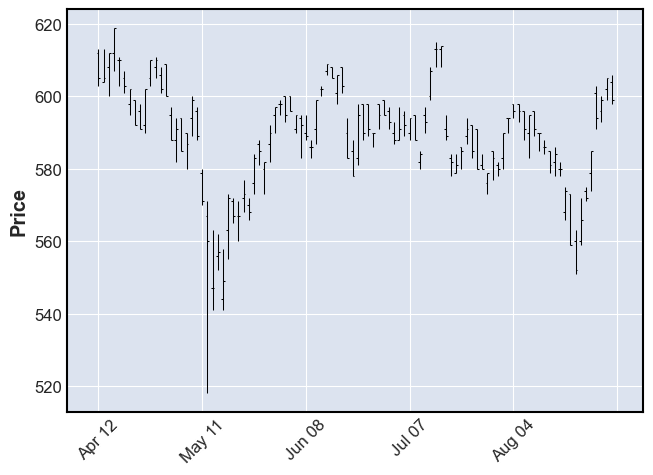

line:


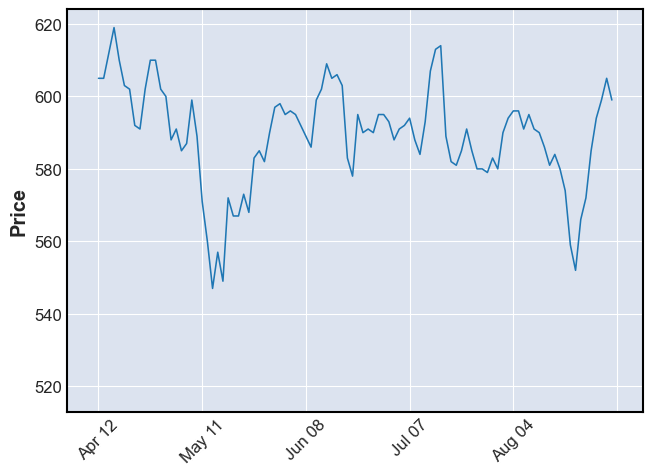

renko:


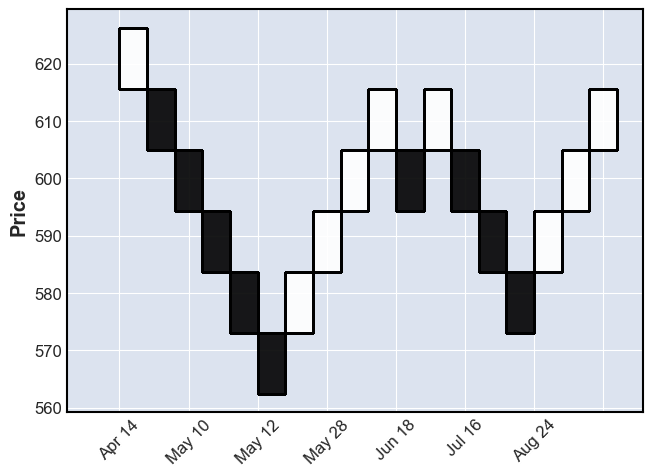

pnf:


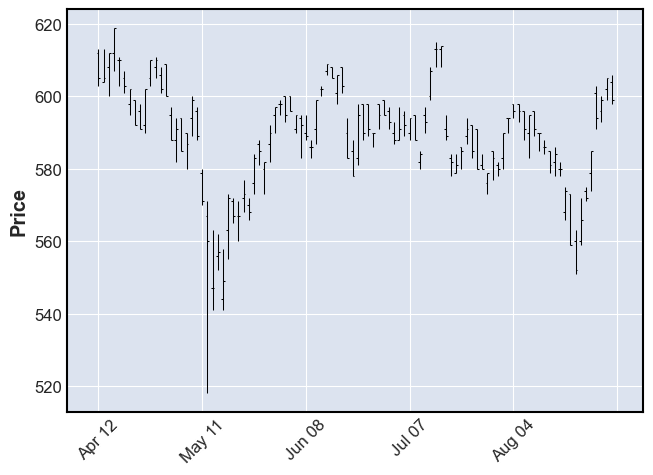

In [19]:
# 繪製不同的圖形

from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData2 = SData.tail(100)  # 只取最後100筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf
print('Candle:')
mpf.plot(SData2, type = 'candle')
print('ohlc:')
mpf.plot(SData2, type = 'ohlc')
print('line:')
mpf.plot(SData2, type = 'line')
print('renko:')
mpf.plot(SData2, type = 'renko')
print('pnf:')
mpf.plot(SData2, type = 'ohlc')


# type='candle', type='line', type='renko', or type='pnf'

## 繪出移動平均線

In [ ]:
# 繪出移動平均線，如5日線、月線、季線

from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData2 = SData.tail(200)  # 只取最後200筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf

mpf.plot(SData2, type = 'candle', mav = 5)  # 畫 5日線
mpf.plot(SData2, type = 'candle', mav = [5, 20, 60])   # 畫 5, 20, 60日線
# mpf.plot(SData2, type = 'candle', mav = (5, 20, 60)   # 畫 5, 20, 60日線，用 ()也可

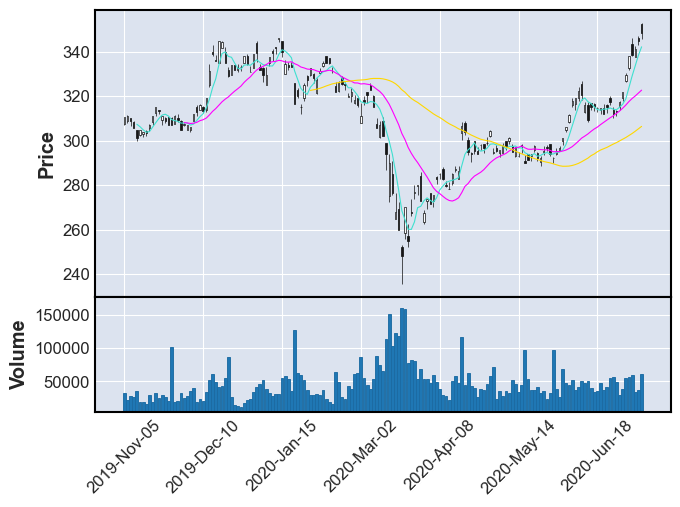

In [20]:
# 繪製移動平均線及成交量

from datetime import datetime
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf

mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True)

# 圖形格式設定

In [ ]:
# 改變顏色(style)、圖案大小(figscale)、與長寬比例(figratio)
    # ：上漲使用紅色，下跌使用綠色
# style = 'charles'
# style = 'mike'    使用實心與空心來表示
# 可以使用 mpf.available_styles() 來看有哪些 style可以使用

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf

mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, style ='charles')
mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, style ='charles', figscale = 2)     # 圖案大小
mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, style ='charles', figscale = 2, figratio=(5,1))   # 長寬比例(figratio)

## 標題及軸標題

In [ ]:
mpf.plot(SData,type='candle',volume=True,
         title='\nS&P 500, Nov 2019',
         ylabel='OHLC Candles',         # 價格的Y軸標題
         ylabel_lower='Shares\nTraded')  #下方量的標題

## x軸格式及旋轉

In [ ]:
mpf.plot(SData,figscale=0.65)
mpf.plot(SData,figscale=0.65,xrotation=20)
mpf.plot(SData,figscale=0.65,datetime_format=' %A, %d-%m-%Y')
mpf.plot(SData,figscale=0.65,datetime_format=' %A, %d-%m-%Y',xrotation=90)

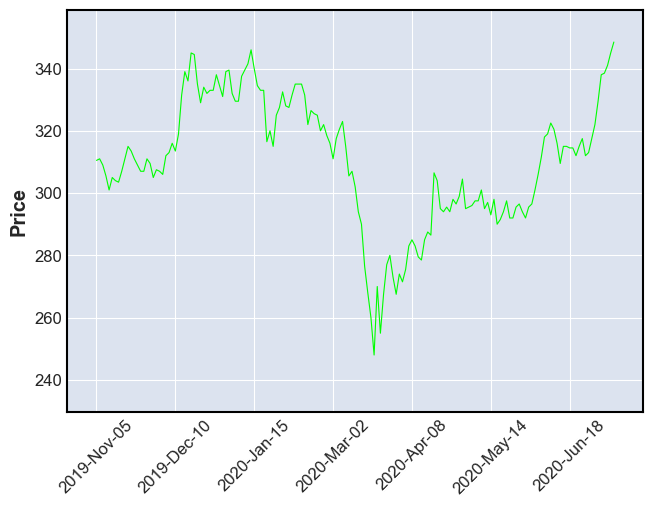

In [23]:
mpf.plot(SData, type='line', linecolor='#00ff00')

In [22]:
mpf.plot(SData, type='line', mav = (5, 20, 60), linecolor=('#00ff00', '#ff0000', '#0000ff', '#666666')

SyntaxError: unexpected EOF while parsing (<ipython-input-22-466da8cbb130>, line 1)

### bars narrower, but our candlesticks thicker

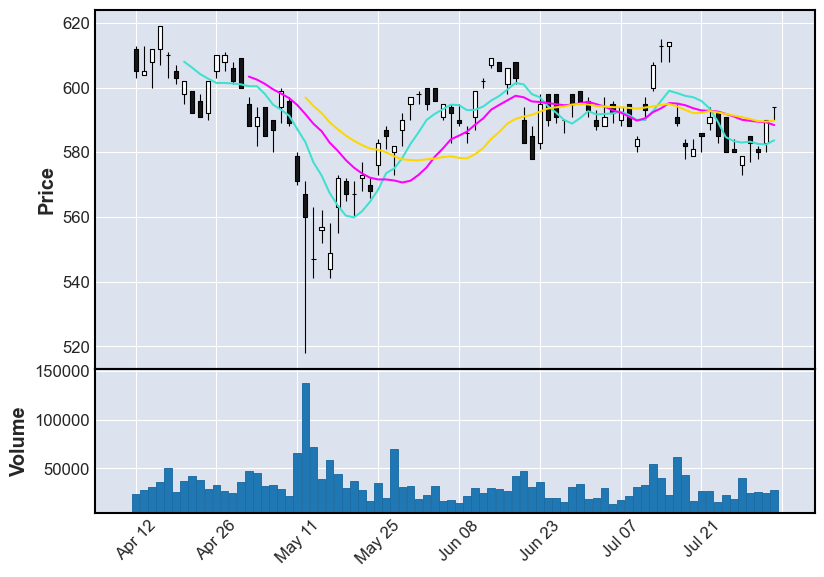

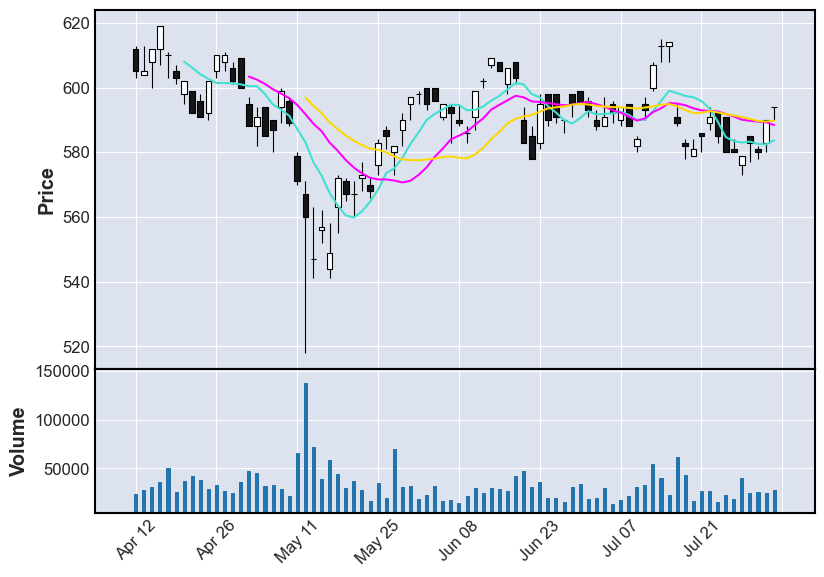

In [24]:
mpf.plot(SData2.iloc[0:80],type='candle',volume=True,mav=(7,15,22),figscale=1.25)
mpf.plot(SData2.iloc[0:80],type='candle',volume=True,mav=(7,15,22),figscale=1.25,scale_width_adjustment=dict(volume=0.4,candle=1.35))

In [ ]:
# 功能同上一個 cell

setup = dict(type='candle',volume=True,mav=(7,15,22),figscale=1.25)
mpf.plot(SData2.iloc[0:80],**setup)
mpf.plot(SData2.iloc[0:80],**setup,scale_width_adjustment=dict(volume=0.4,candle=1.35))

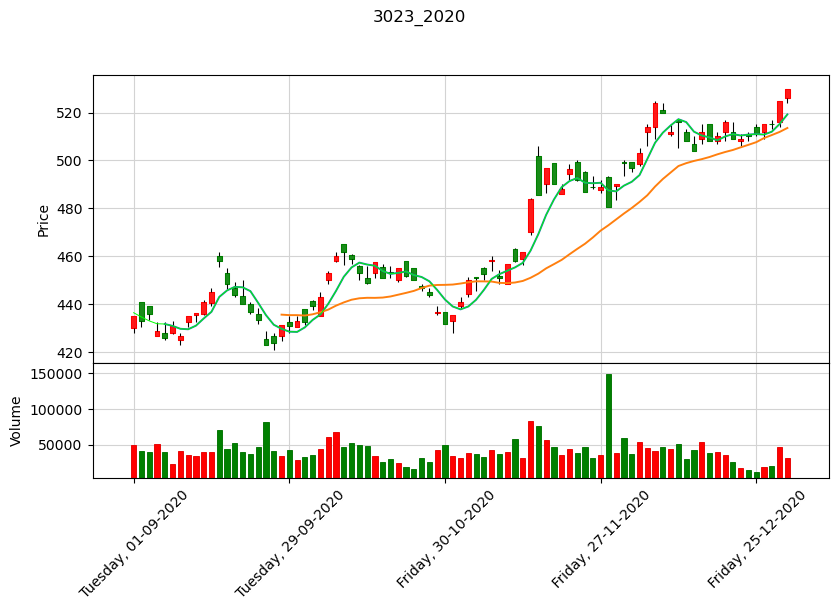

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


In [76]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"../data/2330.csv",
    index_col=0, parse_dates=True)# 檔案無欄位名稱時，names =  ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

df = df.assign(MA5 = np.nan)
for i in range(4, len(df)):
    df['MA5'][i] = (sum(df['Close'][i - 4 : i + 1]) / 5)

# SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

cut = df.loc["2020-09":"2020-12", :]
# mpf.figure(num=1, figsize=(15, 18))


apds = [mpf.make_addplot(cut['MA5'], type='line', color='lime', secondary_y=False, width=0.7),
#         mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
#                          color='dimgray',alpha=1,secondary_y=False),
#         mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
#         mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

# 設置k線圖顏色
my_color = mpf.make_marketcolors(up='red',  # 上漲
                                 down='green',  # 下跌
                                 edge='i',  # 隱藏K線邊緣，或是'inherit'
                                 volume='in',  # 成交量用同樣的顏色，或設定為'inherit' 
                                 inherit=False, wick={'up':'black', 'down':'black'})

my_style = mpf.make_mpf_style(gridaxis='both',  # 設置網格
                              gridstyle='-',
                              y_on_right=False,
                              marketcolors=my_color, gridcolor="lightgray")

mpf.plot(cut, type="candle", mav=(5, 20),
         volume=True, style=my_style, show_nontrading=False,
         figratio=(16, 9), figscale=1, ylabel="Price", ylabel_lower="Volume", 
         title="3023_2020", tight_layout=False, datetime_format=' %A, %d-%m-%Y', xrotation=45,
         scale_width_adjustment=dict(volume=0.7,candle=1.2), addplot=apds)

print(mpf.available_styles())

# 繪製價格與MA重疊圖表

In [25]:
# 5日MA的算法，方法一
# Lai
# 前面四個數的平均皆有平均


price = [i for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
    print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)
print('原始數字', price)
print('5日的MA:', MA)

近五個數字: [1]
近五個數字: [1, 2]
近五個數字: [1, 2, 3]
近五個數字: [1, 2, 3, 4]
近五個數字: [1, 2, 3, 4, 5]
近五個數字: [2, 3, 4, 5, 6]
近五個數字: [3, 4, 5, 6, 7]
近五個數字: [4, 5, 6, 7, 8]
近五個數字: [5, 6, 7, 8, 9]
近五個數字: [6, 7, 8, 9, 10]
近五個數字: [7, 8, 9, 10, 11]
近五個數字: [8, 9, 10, 11, 12]
近五個數字: [9, 10, 11, 12, 13]
近五個數字: [10, 11, 12, 13, 14]
近五個數字: [11, 12, 13, 14, 15]
近五個數字: [12, 13, 14, 15, 16]
近五個數字: [13, 14, 15, 16, 17]
近五個數字: [14, 15, 16, 17, 18]
近五個數字: [15, 16, 17, 18, 19]
原始數字 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
5日的MA: [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


In [27]:
# 5日MA的算法，方法二
# Lai
# 前面四個數不取平均
import numpy as np

price = [i for i in range(1, 20)]

MA2 = [np.nan] * 4
for i in range(4, len(price)):
    MA2.append((sum(price[i-4:i+1])/MAlen))
print(price)
print(MA2)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[nan, nan, nan, nan, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


In [59]:
df = pd.read_csv(
    r"../data/2330.csv",
    index_col=0, parse_dates=True)


df = df.assign(MA5 = np.nan)
for i in range(4, len(df)):
    df['MA5'][i] = (sum(df['Close'][i - 4 : i + 1]) / 5)

print(df)

             Open   High    Low  Close     Volume  MA5
Date                                                  
2011-08-31   69.1   69.4   67.8   69.4  47789.802  NaN
2011-09-01   69.4   69.8   68.6   68.6  47994.636  NaN
2011-09-02   69.5   69.5   67.1   67.5  44964.008  NaN
2011-09-05   66.1   67.1   65.9   66.6  49912.276  NaN
2011-09-06   66.5   67.2   66.1   66.1  40850.716  NaN
...           ...    ...    ...    ...        ...  ...
2021-08-25  579.0  585.0  574.0  585.0  28867.651  NaN
2021-08-26  601.0  603.0  591.0  594.0  45027.320  NaN
2021-08-27  596.0  600.0  593.0  599.0  29459.532  NaN
2021-08-30  602.0  605.0  599.0  605.0  40606.821  NaN
2021-08-31  604.0  606.0  598.0  599.0   9812.000  NaN

[2458 rows x 6 columns]
             Open   High    Low  Close     Volume     MA5
Date                                                     
2011-08-31   69.1   69.4   67.8   69.4  47789.802     NaN
2011-09-01   69.4   69.8   68.6   68.6  47994.636     NaN
2011-09-02   69.5   69.5   6

# 增加自訂的繪圖資料

Date
2011-08-31    104.10
2011-09-01    102.90
2011-09-02    101.25
2011-09-05     99.90
2011-09-06     99.15
               ...  
2021-08-25    877.50
2021-08-26    891.00
2021-08-27    898.50
2021-08-30    907.50
2021-08-31    898.50
Name: Close, Length: 2458, dtype: float64


C:\Users\royya\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


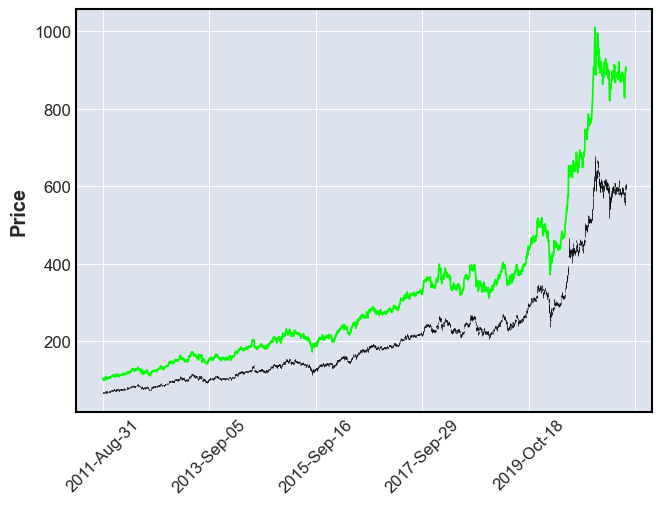

In [29]:
# 增加自訂資料的繪圖線

import mplfinance as mpf
import pandas as pd

SData = pd.read_csv('../data/2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

exp = SData['Close']*1.5
print(exp)

apds = mpf.make_addplot(exp,color='lime')   # 一條線的繪圖方式

# 多條線的繪圖方式
# apds = [mpf.make_addplot(exp12,color='lime'),
#         mpf.make_addplot(exp26,color='c'),
#         mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
#                          color='dimgray',alpha=1,secondary_y=False),
#         mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
#         mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
#        ]

mpf.plot(SData, addplot=apds)    # 繪製股價圖與多出來的圖，要多畫圖可以設定 addplot 參數


In [ ]:
# 增加自訂的繪圖資料
# 布林通道

from talib import abstract
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

stock = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

stock = stock.loc['2019/11/05':,:]   # 取2019/11/05之後的資料

# abstract 需要的 columns 的名稱需要修改
stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume']    
a = abstract.BBANDS(stock2)

upper =a['upperband']
middle =a['middleband']
lower = a['lowerband']

apds = [mpf.make_addplot(upper,color='lime'),
        mpf.make_addplot(middle,color='c'),
        mpf.make_addplot(lower,color='r'),
       ]

mpf.plot(stock2, addplot=apds)    # 繪製股價圖


# 繪製多圖的配置方式（有兩種方式）

* Panels Method （初學者建議使用）
    * Mplfinance allows users to create up to ten vertically stacked "panels", all sharing the same date/time x-axis.
    * https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
    * https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb
* Matplotlib Method

Panels are identified by their "Panel ID", an integer ranging from 0 to 9.
Panel ID's are always numbered from top to bottom, thus:
Panel 0 is always the uppermost panel, Panel 1 is just below that, and so on.
The "main panel" is the panel where candlesticks/ohlc data are plotted.
In the above example, the "main panel" is in the middle (which in this example is Panel 1)

Users can choose which panel is the main panel, and on which panel to plot volume.
By default, if not specified, Panel 0 (the uppermost panel) is used for candlesticks/ohlc data.
By default, if not specified, Panel 1 (second from top) is used for volume.
Previous versions of mplfinance that supported only two panels called these panels "main" and "lower". For backwards compatibility, if any code passes in panel='main' that will be translated to panel=0 and panel='lower' will be translated to panel=1. Going forward, however, users should use only integers to identify panels.

From: https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb

In [ ]:
# https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb
# 待續

# 使用panel 加上繪製 MACD

* MACD (Moving Average Convergence Divergence)

In [ ]:
# First use Pandas to calculate the 12 period and 26 period exponential moving averages:

exp12 = SData2['Close'].ewm(span=12, adjust=False).mean()
exp26 = SData2['Close'].ewm(span=26, adjust=False).mean()

# The MACD Line is defined as the difference between these two moving averages:
macd = exp12 - exp26

In [ ]:
# The MACD Signal is defined as the 9 period exponential moving average of the MACD Line:
# We also calculate the difference between the MACD Line and the MACD Signal which we will plot as a histogram:


signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

mpf.plot(SData2,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style='blueskies',volume=True,volume_panel=2,panel_ratios=(6,3,2))


In [ ]:
# different style:

s = mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'})

mpf.plot(SData2,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style=s,volume=True,volume_panel=2,panel_ratios=(6,3,2))

# 加上特殊的水平線或記號

In [ ]:
# put a horizontal line for my RSI.
# https://github.com/matplotlib/mplfinance/issues/140

apds = [mpf.make_addplot(buy_signal,scatter=True,markersize=100,marker='^'),
        mpf.make_addplot(sell_signal,scatter=True,markersize=100,marker='v'),
        mpf.make_addplot(close_signal,scatter=True,markersize=100,marker='o'),
        mpf.make_addplot(line80,panel='lower',color='r'),
        mpf.make_addplot(line20,panel='lower',color='g'), 
        mpf.make_addplot(rsi,panel='lower',color='g') ]
    
mpf.plot(self.df,addplot=apds,figscale=2,volume=False,type = type,
                 title= str(self.info)
                 )